In [1]:
#Pandas used to read,process and manipulate data
import pandas as pd
import numpy as np

# Plotly to create interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
import pygwalker as pyg

#Seaborn and Matplotlib to create static visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Regex and datetime libraries for data cleaning and transformation.
import re
import regex
import datetime as date
from datetime import datetime

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Reading the csv file "GestationalDiabetes_CleanFile.xlsx" and stores it in a pandas dataframe 'data'
data = pd.read_excel("GestationalDiabetes_CleanFile.xlsx")

# Exploratory Data Analysis

# Using EDA, also known as Data Exploration, let us try to understand the dataset.

# Head of the dataset

In [3]:
data.head()

Participant ID  GCT10 2  systolic BP (mmHg) V1  diastolic BP (mmHg) V1  \
0               1        0                    114                      58   
1               2        1                    178                      78   
2               3        1                    123                      62   
3               4        0                    115                      68   
4               5        0                    116                      61   

   Weight (kg) V1  BMI (kg/m2) V1       Smoking Ethnicity V1  Previous GDM V1  \
0            59.4            20.7  Not recorded        White                0   
1            70.1            29.2  Not recorded        White                0   
2            64.9            26.1  Not recorded        White                0   
3            67.1            24.7         Never        White                0   
4            67.5            23.4         Never        White                0   

   Chronic Illness V1  ...  Fetal hypoglycaemia  Fetal jaundice  \
0                   0  ...                   No              No   
1                   0  ...                   No              No   
2                   0  ...                   No              No   
3                   0  ...                   No              No   
4                   0  ...                   No              No   

   Fetal phototherapy  SCBU Cong malformation      Epidural        Spinal  \
0                  No    No                No  Not recorded  Not recorded   
1                  No    No                No  Not recorded  Not recorded   
2                  No    No                No  Not recorded  Not recorded   
3                  No    No                No  Not recorded  Not recorded   
4                  No    No                No  Not recorded  Not recorded   

  Visit 3 - Reason     Finalstatus  GCT OGTT high 10  
0   Not applicable  Not applicable                 0  
1   Not applicable  Not applicable                 1  
2   Not applicable  Not applicable                 0  
3   Not applicable  Not applicable                 0  
4   Not applicable  Not applicable                 0  

[5 rows x 86 columns]

# Shape of the data

In [4]:
data.shape

(600, 86)

# List types of columns

In [5]:
data.dtypes

Participant ID              int64
GCT10 2                     int64
systolic BP (mmHg) V1       int64
diastolic BP (mmHg) V1      int64
Weight (kg) V1            float64
                           ...   
Epidural                   object
Spinal                     object
Visit 3 - Reason           object
Finalstatus                object
GCT OGTT high 10           object
Length: 86, dtype: object

# Info of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Participant ID                   600 non-null    int64         
 1   GCT10 2                          600 non-null    int64         
 2   systolic BP (mmHg) V1            600 non-null    int64         
 3   diastolic BP (mmHg) V1           600 non-null    int64         
 4   Weight (kg) V1                   600 non-null    float64       
 5   BMI (kg/m2) V1                   600 non-null    float64       
 6   Smoking                          600 non-null    object        
 7   Ethnicity V1                     600 non-null    object        
 8   Previous GDM V1                  600 non-null    int64         
 9   Chronic Illness V1               600 non-null    int64         
 10  Meds 10 V1                       600 non-null    int64        

# Summary of the dataset

In [7]:
data.describe()

Participant ID     GCT10 2  systolic BP (mmHg) V1  \
count      600.000000  600.000000             600.000000   
mean       300.500000    0.495000             121.916667   
std        173.349358    0.500392              12.926777   
min          1.000000    0.000000              89.000000   
25%        150.750000    0.000000             114.000000   
50%        300.500000    0.000000             121.000000   
75%        450.250000    1.000000             129.000000   
max        600.000000    1.000000             178.000000   

       diastolic BP (mmHg) V1  Weight (kg) V1  BMI (kg/m2) V1  \
count              600.000000      600.000000      600.000000   
mean                67.463333       72.107667       26.851167   
std                  9.445670       14.825880        5.784231   
min                 42.000000       42.000000       15.700000   
25%                 60.000000       61.300000       22.600000   
50%                 66.000000       69.600000       25.900000   
75%                 73.000000       79.900000       29.825000   
max                112.000000      133.400000       56.900000   

       Previous GDM V1  Chronic Illness V1  Meds 10 V1      Age>30  ...  \
count       600.000000          600.000000  600.000000  600.000000  ...   
mean          0.023333            0.031667    0.051667    0.628333  ...   
std           0.151086            0.175257    0.221538    0.483653  ...   
min           0.000000            0.000000    0.000000    0.000000  ...   
25%           0.000000            0.000000    0.000000    0.000000  ...   
50%           0.000000            0.000000    0.000000    1.000000  ...   
75%           0.000000            0.000000    0.000000    1.000000  ...   
max           1.000000            1.000000    1.000000    1.000000  ...   

       Weight change  sBP change  BP change (%)  HbA1c change   Hb change  \
count     600.000000  600.000000     600.000000    600.000000  600.000000   
mean        9.264700    1.295000       1.647333      1.048333   -0.552417   
std         5.722229   13.827508      11.212975      2.322712    0.952734   
min       -12.100000  -52.000000     -29.400000     -7.000000   -4.900000   
25%         5.800000   -6.000000      -5.025000      0.000000   -1.200000   
50%         9.900000    0.000000       0.000000      1.000000   -0.500000   
75%        13.000000    9.000000       7.025000      2.000000    0.000000   
max        45.800000   66.000000      52.400000     13.000000    2.200000   

       Creat change (%)  ALT change  CRP change  GA at delivery  \
count        600.000000  600.000000   600.00000      600.000000   
mean           3.746783    0.018350     0.41340       36.225167   
std           16.898673   18.171917     3.60594       11.518961   
min          -45.070000 -173.000000   -14.90000        0.000000   
25%           -5.880000   -3.000000    -0.49250       38.700000   
50%            0.000000    0.000000     0.00000       39.900000   
75%           11.630000    3.000000     0.94000       40.900000   
max          106.380000  194.000000    17.72000       43.000000   

       Birth weight (kg)  
count         600.000000  
mean            3.218767  
std             1.101128  
min             0.000000  
25%             3.090000  
50%             3.440000  
75%             3.830000  
max             5.140000  

[8 rows x 51 columns]

## Pygwalker

In [8]:
#With PyGWalker, we can turn pandas dataframe into a Tableau-style user interface for visual exploration.
gwalker = pyg.walk(data)


## ## PygWalker is an interactive interface to plot charts. The charts plotted using Pygwalker are available in the Tableau presentation, as the charts disappear when we restart the kernel.

# From the summary, we can understand there are no null values.As our goal is to build a predictive model for GDM, 
#### we should consider the column 'Dx with Diagnosis' as our target variable.

In [9]:
data.groupby('Dx with GDM').mean()

Participant ID   GCT10 2  systolic BP (mmHg) V1  \
Dx with GDM                                                       
No                  297.568182  0.464876             121.452479   
Not applicable      287.738095  0.357143             121.666667   
Yes                 326.918919  0.770270             125.094595   

                diastolic BP (mmHg) V1  Weight (kg) V1  BMI (kg/m2) V1  \
Dx with GDM                                                              
No                           67.204545       71.392149       26.504545   
Not applicable               66.309524       72.430952       26.797619   
Yes                          69.810811       76.604054       29.148649   

                Previous GDM V1  Chronic Illness V1  Meds 10 V1    Age>30  \
Dx with GDM                                                                 
No                     0.012397            0.033058    0.055785  0.623967   
Not applicable         0.000000            0.023810    0.047619  0.500000   
Yes                    0.108108            0.027027    0.027027  0.729730   

                ...  Weight change  sBP change  BP change (%)  HbA1c change  \
Dx with GDM     ...                                                           
No              ...      10.402521    1.797521       2.091529      1.216942   
Not applicable  ...       0.726190   -0.071429      -0.059524      0.071429   
Yes             ...       6.668919   -1.216216      -0.289189      0.500000   

                Hb change  Creat change (%)  ALT change  CRP change  \
Dx with GDM                                                           
No              -0.621281          3.807500   -0.549566    0.651322   
Not applicable   0.000000          0.011667   -0.023810    0.275238   
Yes             -0.415541          5.469595    3.756757   -1.064324   

                GA at delivery  Birth weight (kg)  
Dx with GDM                                        
No                   38.912397           3.496149  
Not applicable        0.000000           0.000000  
Yes                  39.209459           3.231405  

[3 rows x 51 columns]

# Since,the target component is going to be Diagnosis with GDM column, we have to remove the rows which has the value 'Not applicable', as it will help with our analysis. 

In [10]:
# filter out rows where the "status" column contains "Not applicable"
data = data.loc[~data['Dx with GDM'].str.contains('Not applicable')]
data.shape

(558, 86)

#  From, the rows have been reduced from 600 to 558. To prepare this column for further analysis, we can convert it to a numerical column using Label Encoding. Label Encoding is a technique for encoding categorical variables into numerical labels.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the 'Dx with GDM' column
data['GDM Diagnosis'] = le.fit_transform(data['Dx with GDM'])

# Print the new dataframe
#pd.set_option('display.max_rows', None)
print(data[['Dx with GDM','GDM Diagnosis']])

    Dx with GDM  GDM Diagnosis
0            No              0
1           Yes              1
2            No              0
3            No              0
4            No              0
..          ...            ...
594          No              0
595          No              0
596         Yes              1
597          No              0
599          No              0

[558 rows x 2 columns]


# The target categorical column has been converted to numerical column using Label Encoding.

In [12]:
# Drop the duplicates
data=data.drop_duplicates()
data.shape

(558, 87)

#### The data seems to be a mix of categorical and numerical variables. Some variables are binary, while others are continuous. 
#### To develop a predictive model for gestational diabetes (GD), it may be advisable to only use data from the first prenatal visit for analysis. This is because many women have transferred care to another provider or discontinued prenatal care before their third visit, which could result in missing data and incomplete records.

#### By focusing on the data from the first visit, the model can potentially include a larger sample size with complete records, which could improve the accuracy and reliability of the model's predictions. Additionally, limiting the analysis to the first visit may help reduce potential bias that could be introduced by missing data from later visits.

In [13]:
columns = [  'systolic BP (mmHg) V1',
       'diastolic BP (mmHg) V1', 'Weight (kg) V1', 'BMI (kg/m2) V1', 
        'GDM Diagnosis','V1 ALT','Previous GDM V1','V1 Gestational Age',
        'V1 Creatinine',
       'Age>30',  'V1 HbA1c (mmol/mol)','1h glucose','V1 U albumin',
        'V1 Platelet','WCC','V1 U creatinine','V1 U protein','V1 Hb']
x = data[columns]

#                                                 Statistical Analysis

# Descriptive statistics of a DataFrame

In [14]:
x.describe()

systolic BP (mmHg) V1  diastolic BP (mmHg) V1  Weight (kg) V1  \
count             558.000000              558.000000      558.000000   
mean              121.935484               67.550179       72.083333   
std                13.035628                9.204840       14.970825   
min                89.000000               47.000000       42.000000   
25%               114.000000               61.000000       61.300000   
50%               121.000000               66.000000       69.300000   
75%               129.000000               73.000000       79.700000   
max               178.000000               97.000000      133.400000   

       BMI (kg/m2) V1  GDM Diagnosis      V1 ALT  Previous GDM V1  \
count      558.000000     558.000000  558.000000       558.000000   
mean        26.855197       0.132616   16.691039         0.025090   
std          5.848261       0.339464   14.777501         0.156538   
min         15.700000       0.000000    2.000000         0.000000   
25%         22.525000       0.000000   10.000000         0.000000   
50%         25.850000       0.000000   13.000000         0.000000   
75%         29.800000       0.000000   18.000000         0.000000   
max         56.900000       1.000000  188.000000         1.000000   

       V1 Gestational Age  V1 Creatinine      Age>30  V1 HbA1c (mmol/mol)  \
count          558.000000     558.000000  558.000000           558.000000   
mean            13.792832      47.388889    0.637993            32.177419   
std              1.577530       8.230151    0.481012             2.464628   
min              8.400000      30.000000    0.000000            24.000000   
25%             12.600000      42.000000    0.000000            31.000000   
50%             13.400000      46.000000    1.000000            32.000000   
75%             14.500000      52.000000    1.000000            34.000000   
max             20.600000      86.000000    1.000000            42.000000   

       1h glucose  V1 U albumin  V1 Platelet         WCC  V1 U creatinine  \
count  558.000000    558.000000   558.000000  558.000000       558.000000   
mean     2.959677      7.288710   252.925986    9.289785         9.283692   
std      3.253145      9.853028    62.189579    2.136404         6.216241   
min      0.000000      0.000000     8.500000    1.900000         0.000000   
25%      0.000000      4.225000   217.000000    7.900000         4.800000   
50%      0.000000      5.000000   249.000000    9.050000         8.400000   
75%      5.875000      7.000000   282.750000   10.500000        12.700000   
max     11.000000    183.600000  1017.000000   18.000000        49.000000   

       V1 U protein       V1 Hb  
count    558.000000  558.000000  
mean       0.125448   12.422760  
std        0.842006    0.798384  
min        0.000000    8.300000  
25%        0.000000   11.900000  
50%        0.100000   12.500000  
75%        0.100000   13.000000  
max       17.800000   14.400000

Observations: We can see basic statistics such as mean, median, standard deviation, minimum, and maximum for each numerical variable in the dataset.

# Data Visualization

Count plot

Negative (0):  484
Positive (0):  74


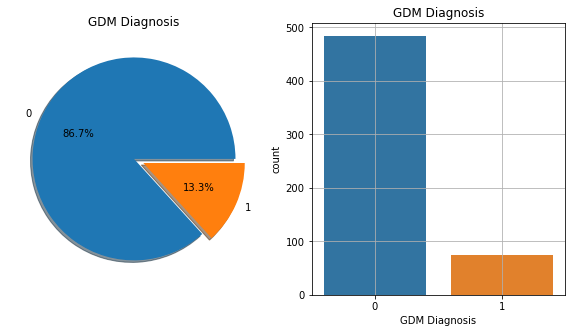

In [15]:
f,ax = plt.subplots(1,2,figsize=(10,5))
x['GDM Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('GDM Diagnosis')
ax[0].set_ylabel('')
sns.countplot('GDM Diagnosis',data=x,ax=ax[1])
ax[1].set_title('GDM Diagnosis')
N,P = x['GDM Diagnosis'].value_counts()
print('Negative (0): ',N)
print('Positive (0): ',P)
plt.grid()
plt.show()

#### 1 represents GDM positive and 0 represents GDM negative. From the plot, we can see that 13.3% of women are diagnosed
#### with GDM, and the rest 86.7% are negative. This tells us that the datset is imbalanced, as the patients 
#### who dont have diabetes is more than those who have GD.

#### Histogram

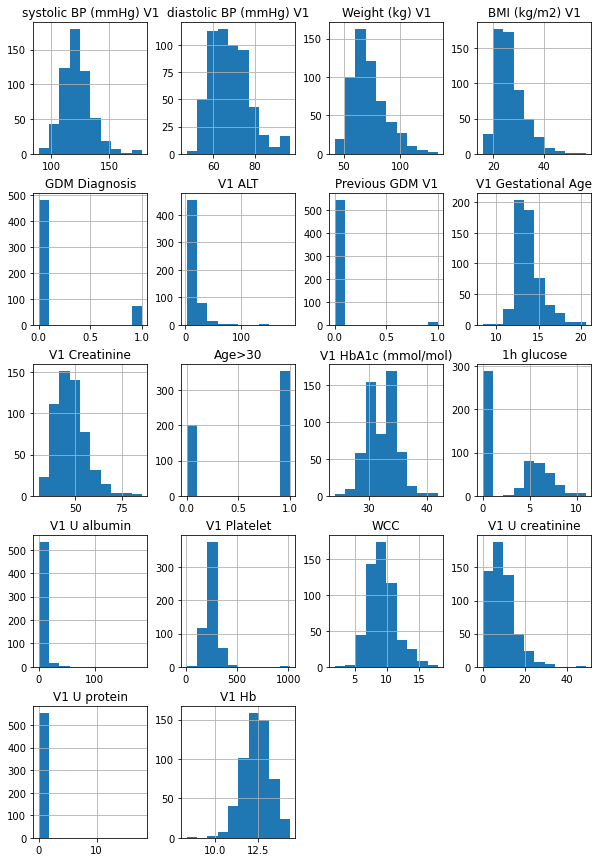

In [16]:
x.hist(bins=10,figsize=(10,15))
plt.show()

#### Dividing the dataframe into independent variable(X) and dependent variable(Y)

In [17]:
target = 'GDM Diagnosis'

# Separate object for target feature
y=x[target]

#separate object for input features
x=x.drop(target,axis=1)

# Feature Selection using chi-square test

In [18]:
# Apply SelectKBest to select the top 10 features
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(x, y)

# Summarize scores
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']  # Name the columns

# Print the feature scores
print(feature_scores.sort_values(by=['Score'], ascending=False))

                   Feature       Score
10              1h glucose  301.397461
12             V1 Platelet  201.683250
2           Weight (kg) V1   24.188061
5          Previous GDM V1   23.435623
4                   V1 ALT   18.259123
3           BMI (kg/m2) V1   16.709803
0    systolic BP (mmHg) V1    6.982648
1   diastolic BP (mmHg) V1    6.454367
9      V1 HbA1c (mmol/mol)    4.450206
13                     WCC    4.405949
8                   Age>30    1.125364
15            V1 U protein    0.828693
11            V1 U albumin    0.397418
14         V1 U creatinine    0.333960
6       V1 Gestational Age    0.142462
7            V1 Creatinine    0.115923
16                   V1 Hb    0.007937


#### We will use the important features from the chi-square test.

In [19]:
feature_columns = [  'systolic BP (mmHg) V1',
       'diastolic BP (mmHg) V1', 'Weight (kg) V1', 'BMI (kg/m2) V1', 
        'GDM Diagnosis','Previous GDM V1','V1 ALT',
       'Age>30',  'V1 HbA1c (mmol/mol)','1h glucose',
        'V1 Platelet','WCC']
df = data[feature_columns]

In [20]:
df.describe()

systolic BP (mmHg) V1  diastolic BP (mmHg) V1  Weight (kg) V1  \
count             558.000000              558.000000      558.000000   
mean              121.935484               67.550179       72.083333   
std                13.035628                9.204840       14.970825   
min                89.000000               47.000000       42.000000   
25%               114.000000               61.000000       61.300000   
50%               121.000000               66.000000       69.300000   
75%               129.000000               73.000000       79.700000   
max               178.000000               97.000000      133.400000   

       BMI (kg/m2) V1  GDM Diagnosis  Previous GDM V1      V1 ALT      Age>30  \
count      558.000000     558.000000       558.000000  558.000000  558.000000   
mean        26.855197       0.132616         0.025090   16.691039    0.637993   
std          5.848261       0.339464         0.156538   14.777501    0.481012   
min         15.700000       0.000000         0.000000    2.000000    0.000000   
25%         22.525000       0.000000         0.000000   10.000000    0.000000   
50%         25.850000       0.000000         0.000000   13.000000    1.000000   
75%         29.800000       0.000000         0.000000   18.000000    1.000000   
max         56.900000       1.000000         1.000000  188.000000    1.000000   

       V1 HbA1c (mmol/mol)  1h glucose  V1 Platelet         WCC  
count           558.000000  558.000000   558.000000  558.000000  
mean             32.177419    2.959677   252.925986    9.289785  
std               2.464628    3.253145    62.189579    2.136404  
min              24.000000    0.000000     8.500000    1.900000  
25%              31.000000    0.000000   217.000000    7.900000  
50%              32.000000    0.000000   249.000000    9.050000  
75%              34.000000    5.875000   282.750000   10.500000  
max              42.000000   11.000000  1017.000000   18.000000

# Univarient Analysis -  It focuses on examining and summarizing individual variables. It involves analyzing the distribution, central tendency, dispersion, and other descriptive statistics of a single variable.

In [21]:
def dist_box(df):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=df.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=df.mean()
    median=df.median()
    mode=df.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Dark2", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=14, fontweight='bold')
    sns.boxplot(x=df,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     #This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Dark2", 8))
    sns.distplot(df,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

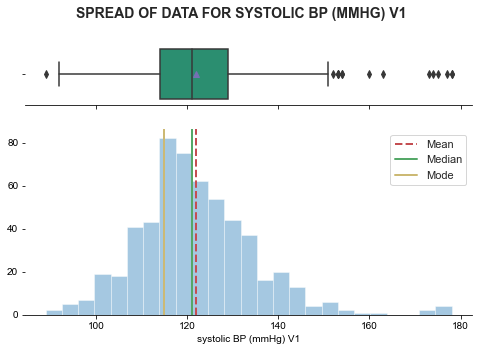

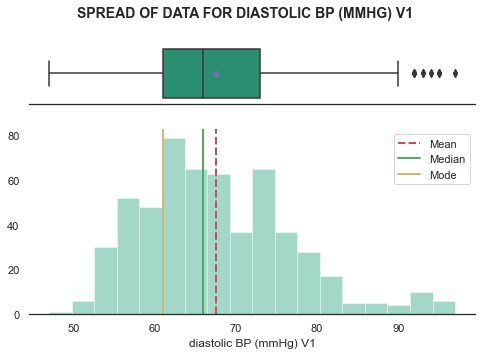

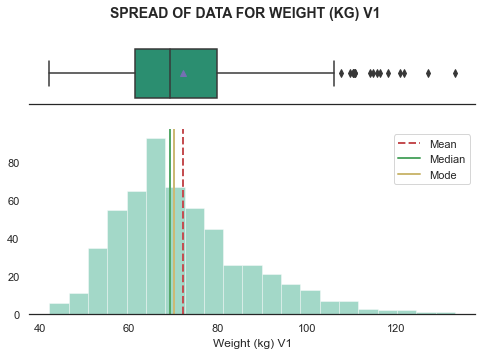

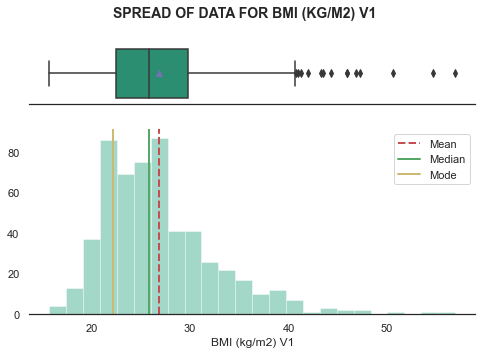

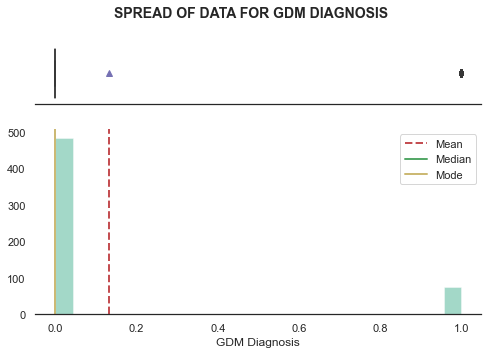

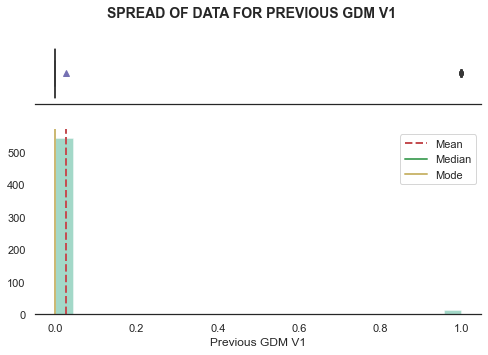

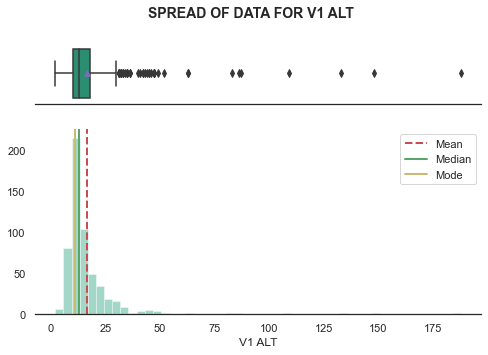

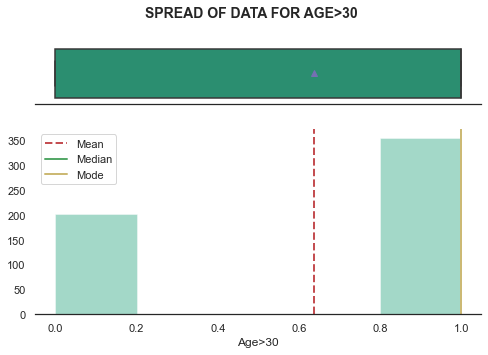

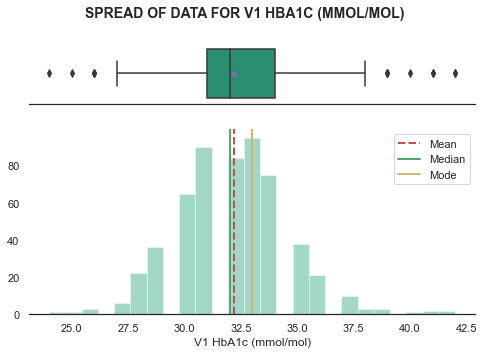

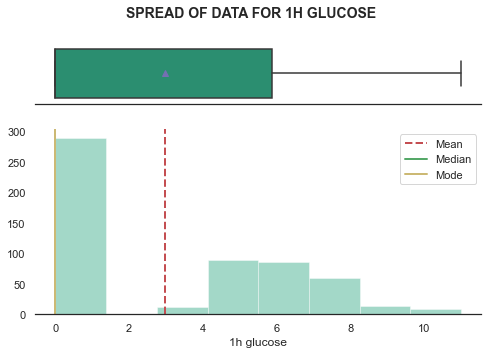

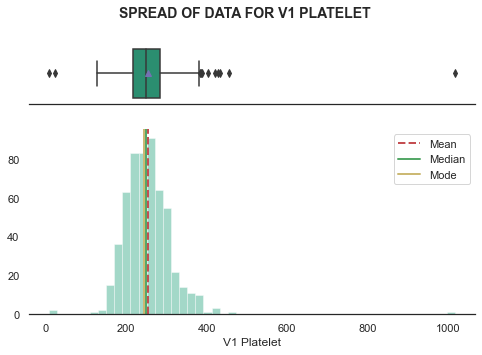

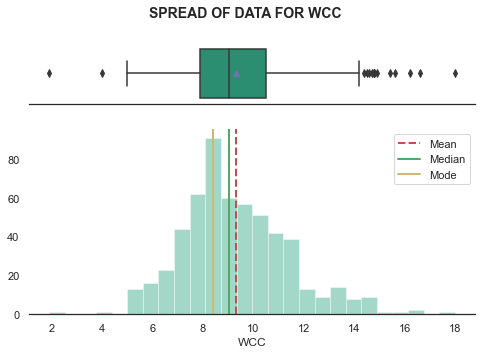

In [22]:
#select all quantitative columns for checking the spread
list_col= df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

Obervations: The spread of data is relatively narrow, with few outliers beyond the upper whisker.There are zero values for column like 1hr glucose.we should replace those values with either mean or median values.

#  Bivarient Analysis- It is for exploring the relationship or association between two variables.

Correlation matrix

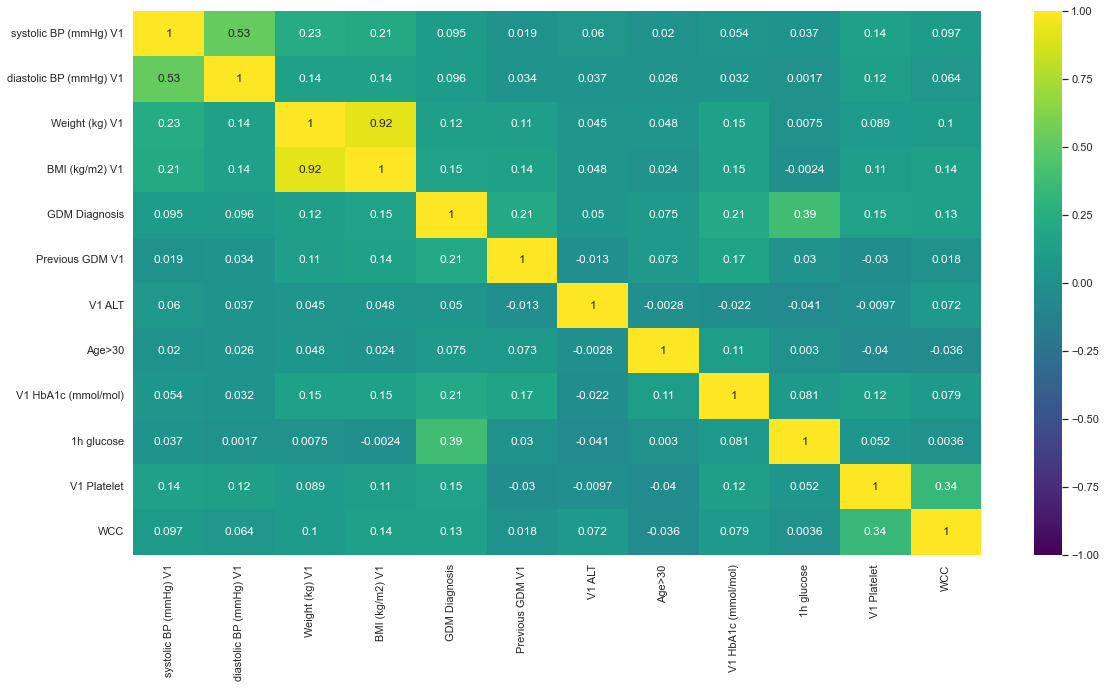

In [23]:
sns.set_palette(sns.color_palette("Set1", 10))
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

Observations: 
There is a strong positive correlation between 'systolic BP (mmHg) V1' and 'diastolic BP (mmHg) V1', indicating that higher systolic blood pressure is often accompanied by higher diastolic blood pressure.
There is a moderate positive correlation between 'Weight (kg) V1' and 'systolic BP (mmHg) V1', suggesting that higher body weight is associated with higher systolic blood pressure.
There is moderate positive correlation between GDM Diagnosis and 1 hr glucose.Also, Previous GDM and GDM Diagnosis are moderately correlated.

Line Plot

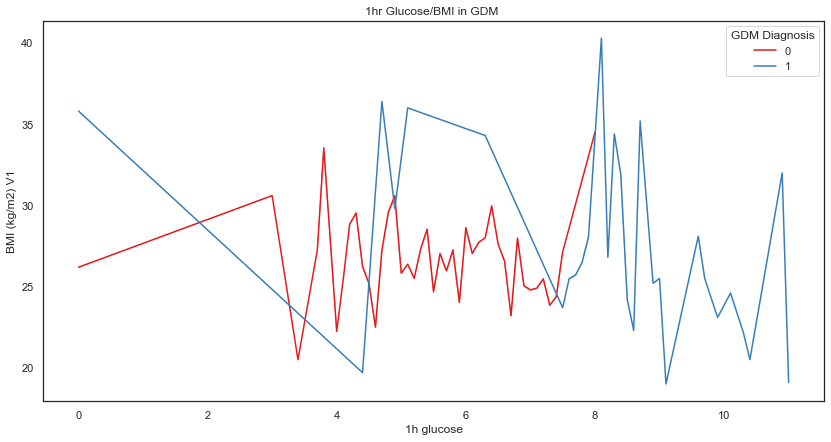

In [24]:
plt.figure(figsize=(14,7))
sns.lineplot(df["1h glucose"],df["BMI (kg/m2) V1"],hue=data["GDM Diagnosis"],ci=0,palette='Set1').set(title= '1hr Glucose/BMI in GDM ')
plt.legend=(1, 1)
plt.show()

Observation: This plot shows the trend between "1h glucose" and "BMI (kg/m2) V1" variables in the context of the "GDM Diagnosis" category.
As the "1h glucose" values increase, there is a general positive trend in the "BMI (kg/m2) V1" values for both the GDM diagnosed and non-diagnosed groups.
The data points for the GDM diagnosed group tend to have higher "1h glucose" and "BMI (kg/m2) V1" values compared to the non-diagnosed group.

# Pair Plot - It is a scatter plot matrix to examine the relationships between multiple variables in a dataset

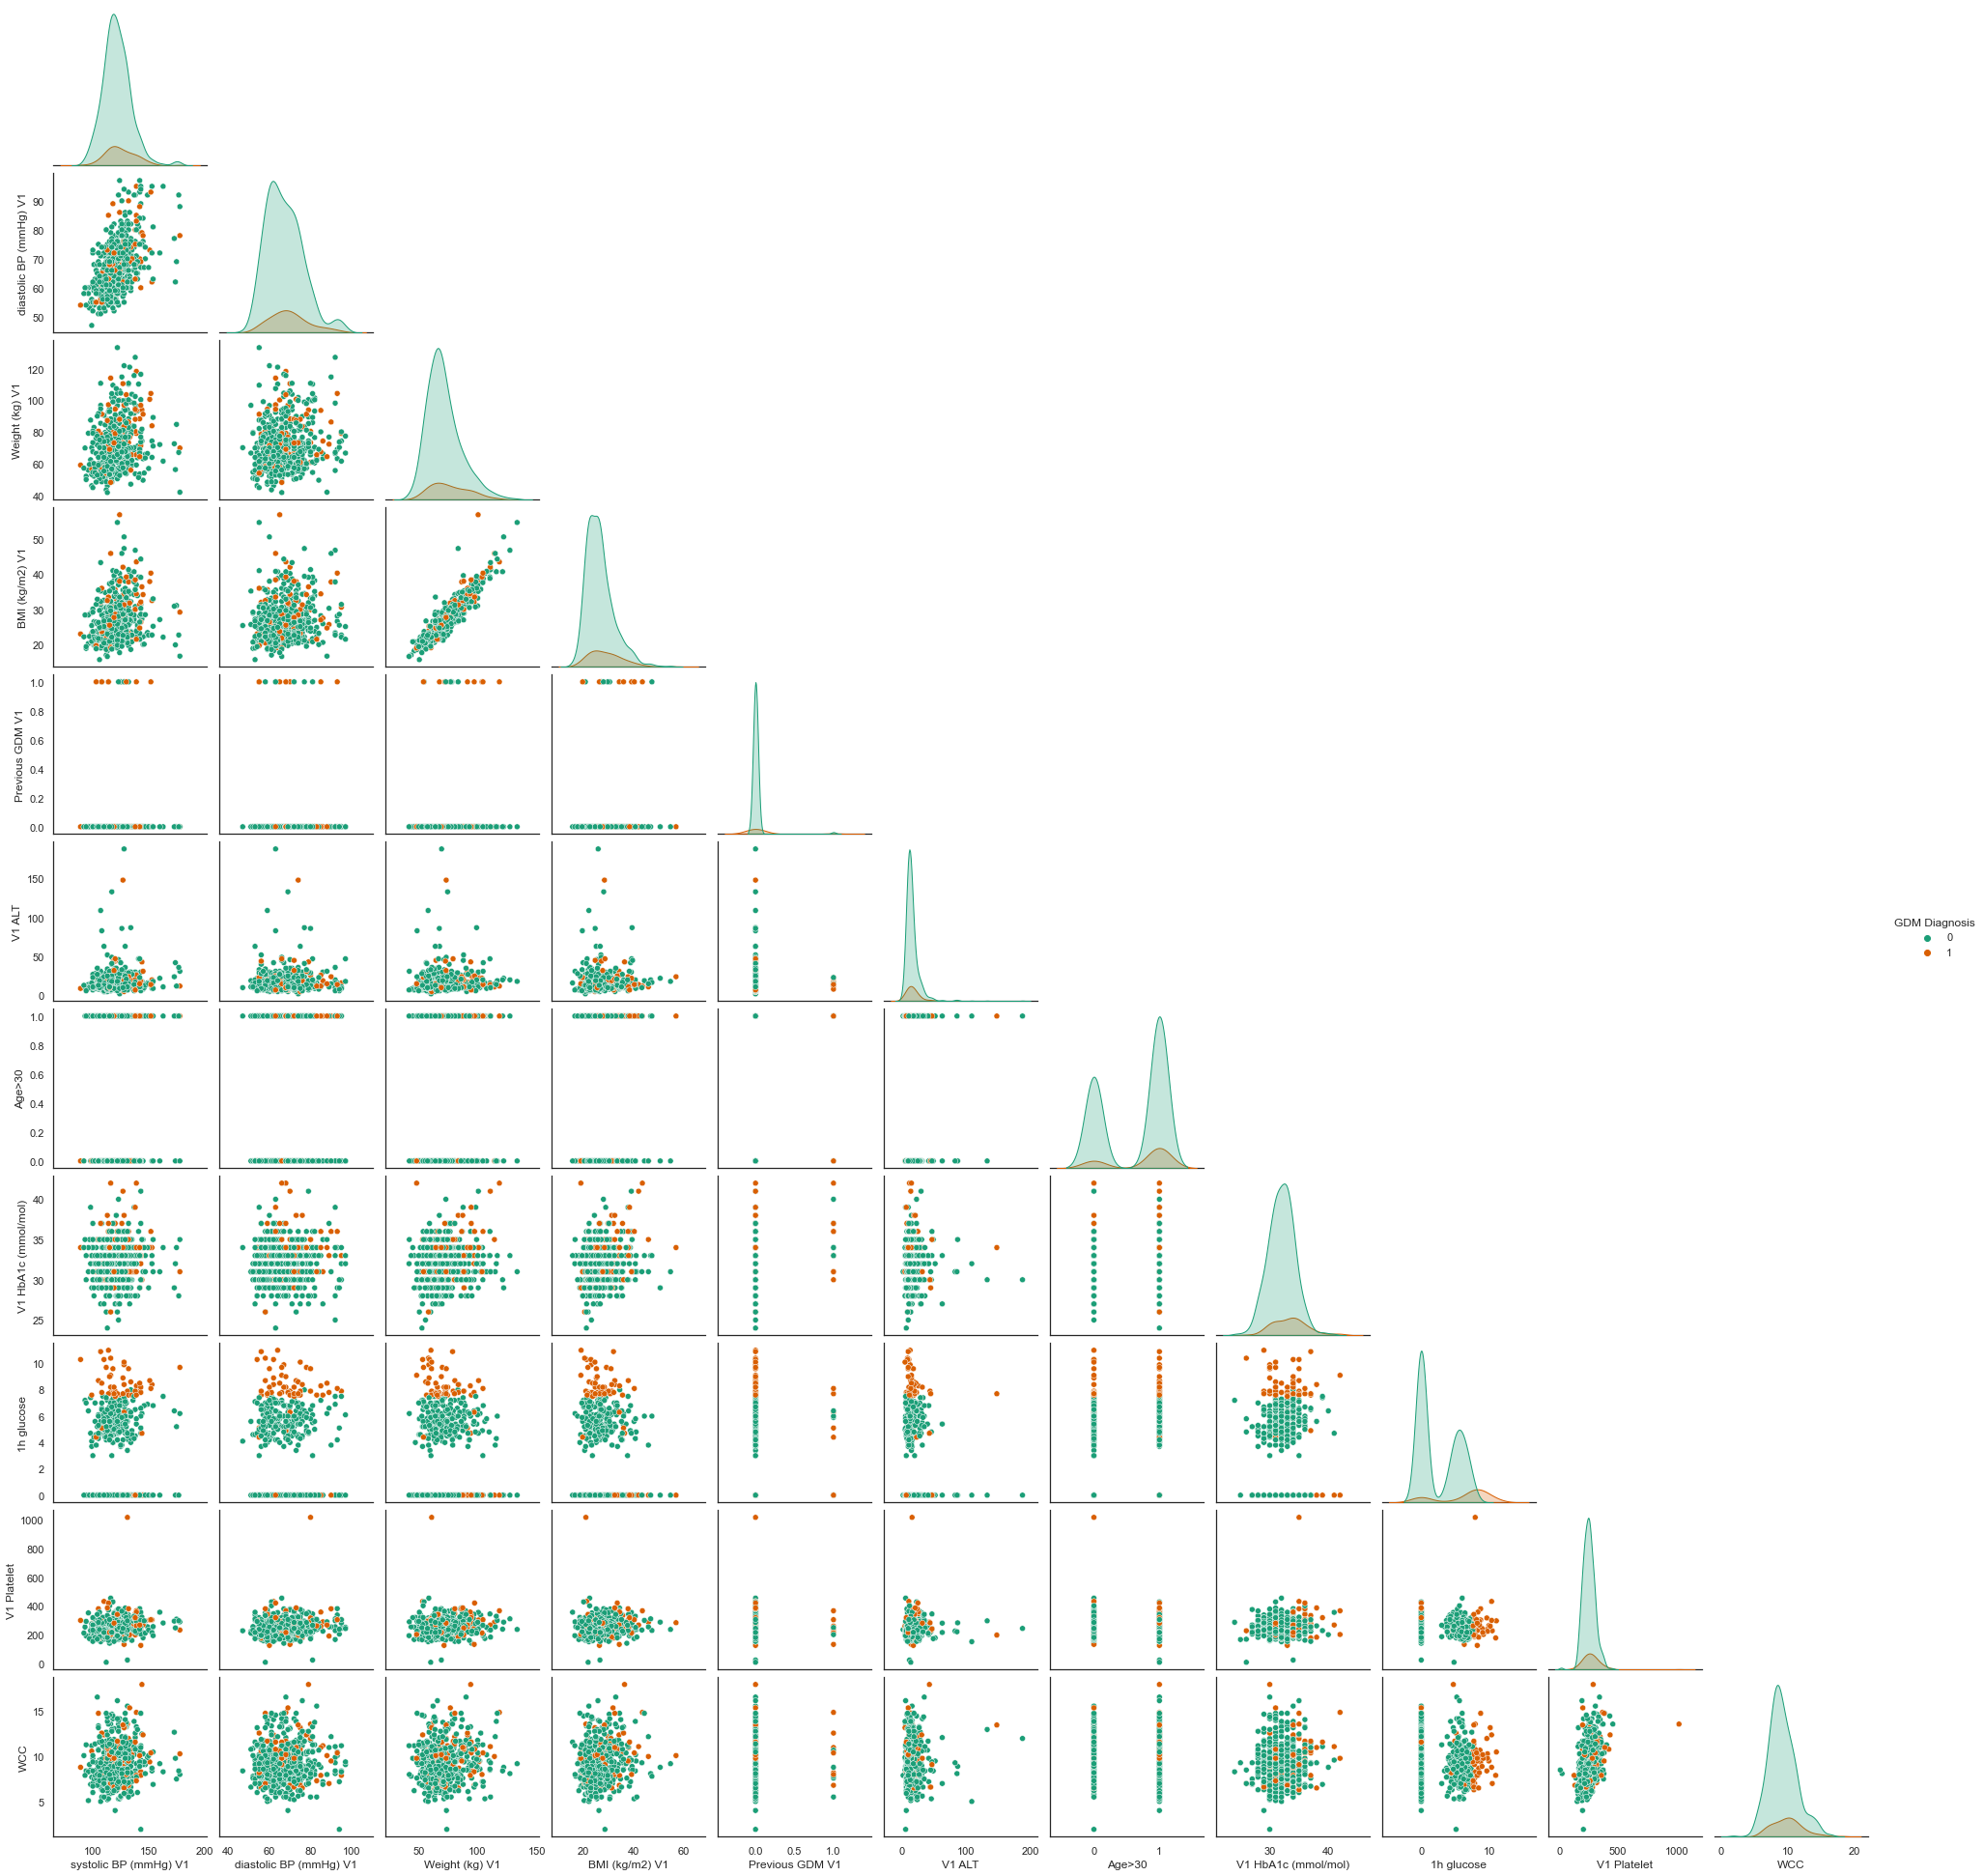

In [25]:
sns.set_palette(sns.color_palette("Dark2", 8))
sns.pairplot(data=df,hue='GDM Diagnosis',corner=True)
plt.show()

Observations - From this plot ,we can infer that there seems to be a positive correlation between systolic blood pressure and weight.the remaining plots are either curved or clusteres and non-linear.

In [26]:
df.describe()

systolic BP (mmHg) V1  diastolic BP (mmHg) V1  Weight (kg) V1  \
count             558.000000              558.000000      558.000000   
mean              121.935484               67.550179       72.083333   
std                13.035628                9.204840       14.970825   
min                89.000000               47.000000       42.000000   
25%               114.000000               61.000000       61.300000   
50%               121.000000               66.000000       69.300000   
75%               129.000000               73.000000       79.700000   
max               178.000000               97.000000      133.400000   

       BMI (kg/m2) V1  GDM Diagnosis  Previous GDM V1      V1 ALT      Age>30  \
count      558.000000     558.000000       558.000000  558.000000  558.000000   
mean        26.855197       0.132616         0.025090   16.691039    0.637993   
std          5.848261       0.339464         0.156538   14.777501    0.481012   
min         15.700000       0.000000         0.000000    2.000000    0.000000   
25%         22.525000       0.000000         0.000000   10.000000    0.000000   
50%         25.850000       0.000000         0.000000   13.000000    1.000000   
75%         29.800000       0.000000         0.000000   18.000000    1.000000   
max         56.900000       1.000000         1.000000  188.000000    1.000000   

       V1 HbA1c (mmol/mol)  1h glucose  V1 Platelet         WCC  
count           558.000000  558.000000   558.000000  558.000000  
mean             32.177419    2.959677   252.925986    9.289785  
std               2.464628    3.253145    62.189579    2.136404  
min              24.000000    0.000000     8.500000    1.900000  
25%              31.000000    0.000000   217.000000    7.900000  
50%              32.000000    0.000000   249.000000    9.050000  
75%              34.000000    5.875000   282.750000   10.500000  
max              42.000000   11.000000  1017.000000   18.000000

# Replacing Missing value of 1 hr Glucose to median

In [27]:
quartile_75 = df['1h glucose'].quantile(0.75)
df.loc[df['1h glucose'] == 0.0, '1h glucose'] = quartile_75

In [28]:
df.describe()

systolic BP (mmHg) V1  diastolic BP (mmHg) V1  Weight (kg) V1  \
count             558.000000              558.000000      558.000000   
mean              121.935484               67.550179       72.083333   
std                13.035628                9.204840       14.970825   
min                89.000000               47.000000       42.000000   
25%               114.000000               61.000000       61.300000   
50%               121.000000               66.000000       69.300000   
75%               129.000000               73.000000       79.700000   
max               178.000000               97.000000      133.400000   

       BMI (kg/m2) V1  GDM Diagnosis  Previous GDM V1      V1 ALT      Age>30  \
count      558.000000     558.000000       558.000000  558.000000  558.000000   
mean        26.855197       0.132616         0.025090   16.691039    0.637993   
std          5.848261       0.339464         0.156538   14.777501    0.481012   
min         15.700000       0.000000         0.000000    2.000000    0.000000   
25%         22.525000       0.000000         0.000000   10.000000    0.000000   
50%         25.850000       0.000000         0.000000   13.000000    1.000000   
75%         29.800000       0.000000         0.000000   18.000000    1.000000   
max         56.900000       1.000000         1.000000  188.000000    1.000000   

       V1 HbA1c (mmol/mol)  1h glucose  V1 Platelet         WCC  
count           558.000000  558.000000   558.000000  558.000000  
mean             32.177419    6.012993   252.925986    9.289785  
std               2.464628    1.052523    62.189579    2.136404  
min              24.000000    3.000000     8.500000    1.900000  
25%              31.000000    5.875000   217.000000    7.900000  
50%              32.000000    5.875000   249.000000    9.050000  
75%              34.000000    5.893750   282.750000   10.500000  
max              42.000000   11.000000  1017.000000   18.000000

# Predictive Modelling

# From statistical analysis, the patterns and relationships observed in the scatter plots between the target variable and the predictor variables are non-linear. So, for data modelling  we are considering non-linear regression models like decision trees, random forests,bagging classifier and so on.

In [29]:
X = df.drop('GDM Diagnosis',axis=1)
y = df['GDM Diagnosis'] 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

print(X_train.shape, X_test.shape)

(446, 11) (112, 11)


In [31]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

In [32]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='YlGn',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [33]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    model : classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",round(train_acc,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",round(test_acc,3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m",round(train_recall,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" , round(test_recall,3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m", round(train_precision,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ", round(test_precision,3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",round(train_f1,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m", round(test_f1,3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list 

In [34]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add score to list for comparision'''  
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# Decision Tree

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.955
 Recall     : Train: 1.0  Test: 0.8
 Precision  : Train: 1.0  Test:  0.857
 F1         : Train: 1.0  Test: 0.828


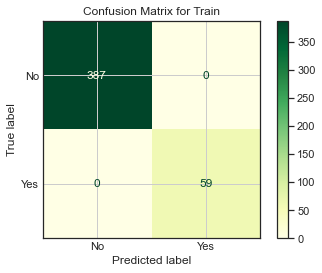

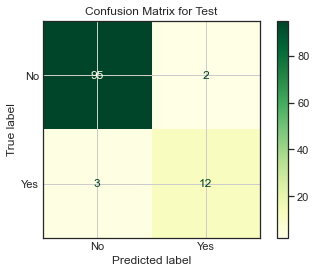

In [35]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(d_tree,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

In [36]:
add_score_model(score_list_dt)

# Random Forest

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.946
 Recall     : Train: 1.0  Test: 0.667
 Precision  : Train: 1.0  Test:  0.909
 F1         : Train: 1.0  Test: 0.769


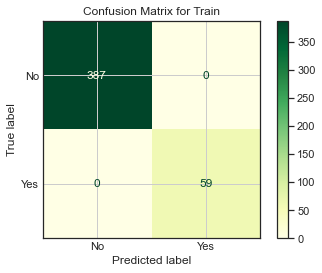

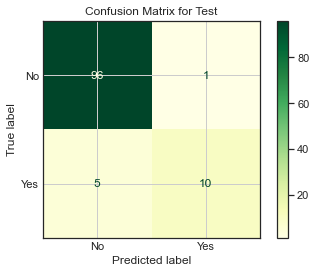

In [37]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_scaled_df,y_train)
score_list_rf=get_metrics_score(rf_estimator,X_train_scaled_df,X_test_scaled,y_train,y_test)

In [38]:
add_score_model(score_list_rf)

# Bagging Classifier

 MODEL PERFORMANCE
 Accuracy   : Train: 0.991  Test:  0.911
 Recall     : Train: 0.949  Test: 0.6
 Precision  : Train: 0.982  Test:  0.692
 F1         : Train: 0.966  Test: 0.643


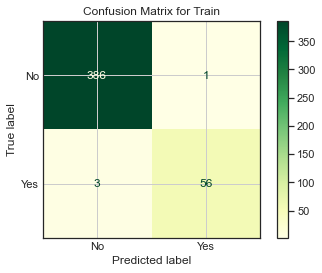

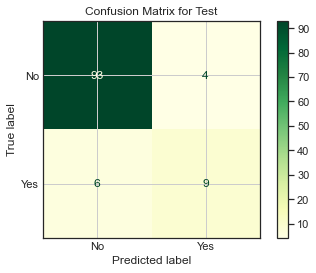

In [39]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_scaled_df,y_train)

score_list_bc=get_metrics_score(bagging_classifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

In [40]:
add_score_model(score_list_bc)

# SVC

 MODEL PERFORMANCE
 Accuracy   : Train: 0.966  Test:  0.902
 Recall     : Train: 0.746  Test: 0.4
 Precision  : Train: 1.0  Test:  0.75
 F1         : Train: 0.854  Test: 0.522


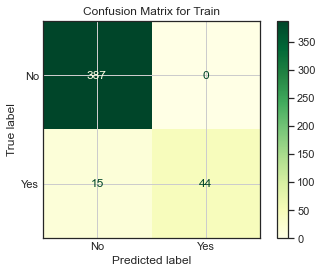

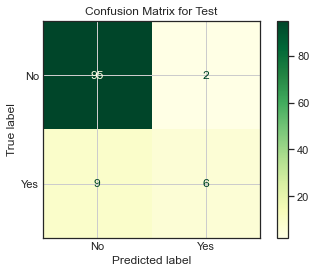

In [41]:
from sklearn.svm import SVC
SVC_Classifier=SVC()
SVC_Classifier.fit(X_train_scaled_df,y_train)
score_svc=get_metrics_score(SVC_Classifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)
add_score_model(score_svc)

# KNN

 MODEL PERFORMANCE
 Accuracy   : Train: 0.933  Test:  0.884
 Recall     : Train: 0.542  Test: 0.333
 Precision  : Train: 0.914  Test:  0.625
 F1         : Train: 0.681  Test: 0.435


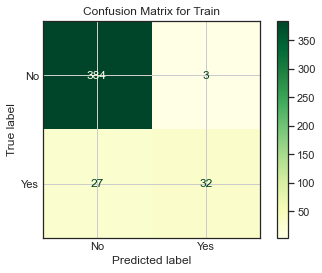

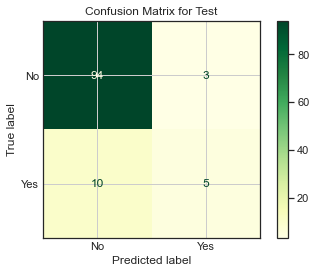

In [42]:
#KNeighbors Classification
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled_df,y_train)
#knn_pred =knn.predict(X_test)
score_knn=get_metrics_score(knn,X_train_scaled_df,X_test_scaled_df,y_train,y_test)
add_score_model(score_knn)

# Comparing all Models

In [43]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest','Bagging Classifier','SVC','KNeighborsClassifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0         Decision Tree        1.000000       0.955357      1.000000   
1         Random Forest        1.000000       0.946429      1.000000   
2    Bagging Classifier        0.991031       0.910714      0.949153   
3                   SVC        0.966368       0.901786      0.745763   
4  KNeighborsClassifier        0.932735       0.883929      0.542373   

   Test_Recall  Train_Precision  Test_Precision  
0     0.800000         1.000000        0.857143  
1     0.666667         1.000000        0.909091  
2     0.600000         0.982456        0.692308  
3     0.400000         1.000000        0.750000  
4     0.333333         0.914286        0.625000

# Among all the models,Decision Tree and Random Forest models achieved high accuracy and precision on both the test datasets, but the train scores indicate signs of overfitting. A higher recall value indicates a lower rate of false negatives.A recall of 0.8 means that the model correctly identified 80% of the actual positive samples.